In [1]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyprojroot
import seaborn as sns
import toml
from tqdm import tqdm
import vak

import article

In [2]:
RESULTS_ROOT = pyprojroot.here()  / 'results' / 'Bengalese_Finches' / 'behavior'

CSV_FNAME = 'transition-probabilities.csv'
probs_csv = RESULTS_ROOT / CSV_FNAME
df = pd.read_csv(probs_csv)

JSON_FNAME = 'transition-probabilities-x-y-plot.json'
xyerr_json = RESULTS_ROOT / JSON_FNAME

with xyerr_json.open('r') as fp:
    animal_xyerr = json.load(fp)

In [3]:
sns.set()

In [4]:
FIG_ROOT = pyprojroot.here() / 'doc' / 'article' / 'figures' / 'mainfig_bf_behavior'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


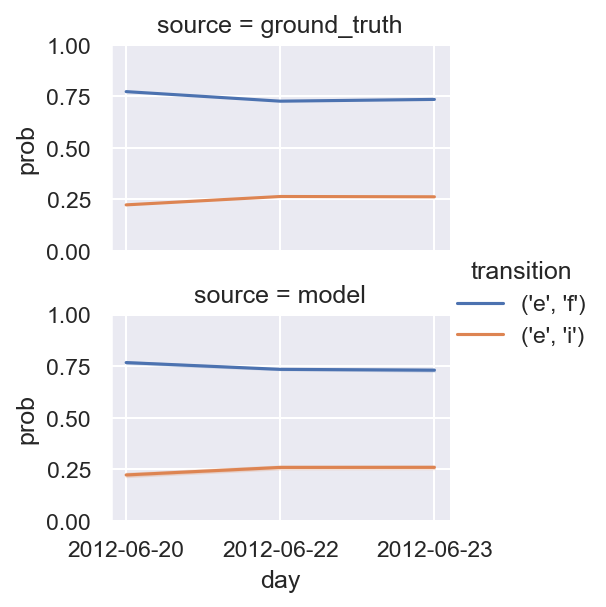

In [5]:
df_gr41rd51 = df[df.animal_id == 'gr41rd51']

g = sns.relplot(
    data=df_gr41rd51,
    x='day',
    y='prob',
    hue='transition',
    row='source',
    ci='sd',
    kind='line',
    height=2,
    aspect=1.5,
)

g.fig.set_dpi(150)

for ax_ in g.axes.ravel():
    ax_.set_ylim([0., 1.])

FIG_STEM = 'transition-probabilities-representative-case-across-days'
    
for ext in ('eps', 'pdf', 'svg'):
    g.fig.savefig(FIG_ROOT / f'{FIG_STEM}.{ext}')

In [6]:
MARKERS = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


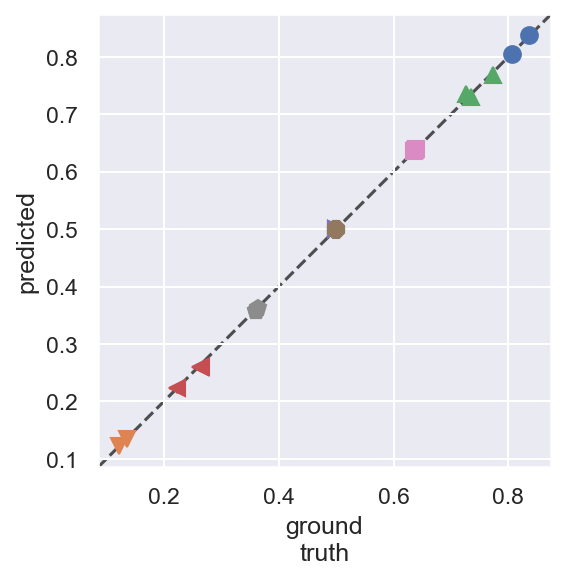

In [7]:
fig, ax = plt.subplots()

for (animal_id_trans_tup, xyerr_dict), marker in zip(animal_xyerr.items(), MARKERS):
    x, y, yerr = xyerr_dict['x'], xyerr_dict['y'], xyerr_dict['yerr'],
    ax.errorbar(x, y, yerr=yerr, fmt=marker, markersize=8)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_xlabel('ground\ntruth')
ax.set_ylabel('predicted')


fig.set_dpi(150)

FIG_STEM = 'transition-probabilities-x-y-plot'
    
for ext in ('eps', 'pdf', 'svg'):
    g.fig.savefig(FIG_ROOT / f'{FIG_STEM}.{ext}')

#### panel D: scatter plot of std(ground truth) v. std(predicted)